# Análisis de datos del experimento 4:

## 1) Análisis de la base de datos:

In [1]:
#Número del experimento:
exp_num = 4

In [2]:
# Copio manualmente los siguientes datos del experimento para poder saber qué base de datos leer:
max_ruido_dB = -45
add_noise = True
snr = [-5, 20] 
tr_aug = [0.2, 3.1, 0.1] 
drr_aug = [-6, 19, 1]

#La base de datos es: 
db_name = f'base_de_datos_{max_ruido_dB}_noise_{add_noise}_traug_{tr_aug[0]}_{tr_aug[1]}_{tr_aug[2]}_drraug_{drr_aug[0]}_{drr_aug[1]}_{drr_aug[2]}_snr_{snr[0]}_{snr[-1]}'

In [3]:
# Copio manualmente los datos de la red dentro del experimento para poder reconstruir el modelo:
#Parámetros de la red:
filters = [32, 18, 8, 4] 
kernel_size = [10, 5, 5, 5] 
activation = ['relu','relu','relu','relu'] 
pool_size = [2,2,2]
learning_rate = 0.001

In [4]:
# Importo paquetes:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle
import numpy as np
from scipy import stats
from progress.bar import IncrementalBar

In [5]:
resumen_t30 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_c80 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}
resumen_d50 = {'Banda [Hz]': [], 'r': [], 'p': [], 'Tot audios': [], 'Percentil 95': [], 'Max': [], 'Min': []}

In [6]:
partitions = os.listdir(f'../cache/{db_name}')
db = pd.DataFrame()
bar = IncrementalBar('Reading data base', max = len(partitions))
for partition in partitions:
    #Leo la base de datos:
    with open(f'../cache/{db_name}/{partition}', "rb") as fh:
        aux_df = pickle.load(fh)
    db = db.append(aux_df, ignore_index=True)
    bar.next()
bar.finish()
db.head()

<ipython-input-6-96076f6a57f6>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  db = db.append(aux_df, ignore_index=True)


ReverbedAudio  banda  \
0  F1s3|sintetica_Seed1565004433_Tr2.8|original    125   
1  F1s3|sintetica_Seed1565004433_Tr2.8|original    250   
2  F1s3|sintetica_Seed1565004433_Tr2.8|original    500   
3  F1s3|sintetica_Seed1565004433_Tr2.8|original   1000   
4  F1s3|sintetica_Seed1565004433_Tr2.8|original   2000   

                                                 tae  \
0  [0.0032587449886847023, 0.4667425415666571, 0....   
1  [0.005535032471583804, 0.49213351386794635, 0....   
2  [-0.005060709654023858, 0.46610700971238006, 0...   
3  [0.0016727610815168554, 0.46795354947267537, 0...   
4  [0.0034908781412994094, 0.4666601356125794, 0....   

                                         descriptors        snr        drr  
0  [2.736479380744559, -6.038189124096391, -4.297...  15.642128 -12.053504  
1  [2.8057585490321384, -3.6626970334729685, -1.9...   4.738493  -9.832319  
2  [2.7910607891917456, -4.718704667784649, -2.82...  -4.628649 -13.051719  
3  [2.813513518158915, -6.665483099286145, -3.814...  -3.008279 -13.550271  
4  [2.799113897475244, -5.936620211234544, -3.447...   7.399513 -14.256546

In [7]:
#Veo cuántos audios hay por banda:
bands = [125, 250, 500, 1000, 2000, 4000, 8000]

resumen_db = {'Banda [Hz]': [], 'Tot audios': [], }

for band in bands:
    
    tot_data_per_band = len(db.loc[db.banda == band])
    
    db_band = db.loc[db.banda == band]
    descriptors = db_band.descriptors.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    resumen_t30['Tot audios'].append(tot_data_per_band)
    resumen_t30['Percentil 95'].append(np.round(np.percentile(t30, 95),3))
    resumen_t30['Max'].append(np.round(np.max(t30),3))
    resumen_t30['Min'].append(np.round(np.min(t30),3))

    resumen_c50['Tot audios'].append(tot_data_per_band)
    resumen_c50['Percentil 95'].append(np.round(np.percentile(c50, 95),3))
    resumen_c50['Max'].append(np.round(np.max(c50),3))
    resumen_c50['Min'].append(np.round(np.min(c50),3))

    resumen_c80['Tot audios'].append(tot_data_per_band)
    resumen_c80['Percentil 95'].append(np.round(np.percentile(c80, 95),3))
    resumen_c80['Max'].append(np.round(np.max(c80),3))
    resumen_c80['Min'].append(np.round(np.min(c80),3))

    resumen_d50['Tot audios'].append(tot_data_per_band)
    resumen_d50['Percentil 95'].append(np.round(np.percentile(d50, 95),3))
    resumen_d50['Max'].append(np.round(np.max(d50),3))
    resumen_d50['Min'].append(np.round(np.min(d50),3))

In [8]:
#Tiempo de reverberación por banda y por sala:

great_hall = {'Name': [], 'Band': [], 'T30': []}
octagon = {'Name': [], 'Band': [], 'T30': []}
classroom = {'Name': [], 'Band': [], 'T30': []}

for i in range(len(db)):

    if ('great_hall' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        great_hall['Name'].append(db.ReverbedAudio[i].split('|')[1])
        great_hall['Band'].append(db.banda[i])
        great_hall['T30'].append(db.descriptors[i][0])

    elif ('octagon' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        octagon['Name'].append(db.ReverbedAudio[i].split('|')[1])
        octagon['Band'].append(db.banda[i])
        octagon['T30'].append(db.descriptors[i][0])

    elif ('classroom' in db.ReverbedAudio[i]) and ('original' in db.ReverbedAudio[i]):
        classroom['Name'].append(db.ReverbedAudio[i].split('|')[1])
        classroom['Band'].append(db.banda[i])
        classroom['T30'].append(db.descriptors[i][0])

df_great_hall = pd.DataFrame(great_hall)
df_octagon = pd.DataFrame(octagon)
df_classroom = pd.DataFrame(classroom)


for band in bands:
    print(f'\nBanda {band}:\n')
    df_great_hall_band = df_great_hall.loc[df_great_hall.Band == band]
    df_octagon_band = df_octagon.loc[df_octagon.Band == band]
    df_classroom_band = df_classroom.loc[df_classroom.Band == band]

    print(f'great_hall: Media: {np.round(np.mean(df_great_hall_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_great_hall_band.T30.to_numpy()),2)}')
    print(f'octagon: Media: {np.round(np.mean(df_octagon_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_octagon_band.T30.to_numpy()),2)}')
    print(f'classroom: Media: {np.round(np.mean(df_classroom_band.T30.to_numpy()),2)}, Desvío: {np.round(np.std(df_classroom_band.T30.to_numpy()),2)}')



Banda 125:

great_hall: Media: nan, Desvío: nan
octagon: Media: nan, Desvío: nan
classroom: Media: nan, Desvío: nan

Banda 250:

great_hall: Media: 2.17, Desvío: 0.16
octagon: Media: 2.41, Desvío: 0.11
classroom: Media: 2.19, Desvío: 0.11

Banda 500:

great_hall: Media: 2.44, Desvío: 0.07
octagon: Media: 3.05, Desvío: 0.06
classroom: Media: 2.07, Desvío: 0.05

Banda 1000:

great_hall: Media: 2.48, Desvío: 0.05
octagon: Media: 3.34, Desvío: 0.06
classroom: Media: 1.88, Desvío: 0.03

Banda 2000:

great_hall: Media: 2.34, Desvío: 0.06
octagon: Media: 2.96, Desvío: 0.03
classroom: Media: 1.99, Desvío: 0.02

Banda 4000:

great_hall: Media: 1.93, Desvío: 0.07
octagon: Media: 2.43, Desvío: 0.04
classroom: Media: 1.74, Desvío: 0.02

Banda 8000:

great_hall: Media: 1.36, Desvío: 0.06
octagon: Media: 1.69, Desvío: 0.04
classroom: Media: 1.29, Desvío: 0.01


C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\maxia\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Análisis para la banda 125



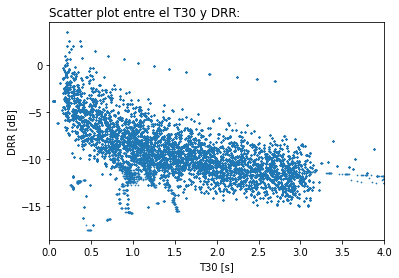

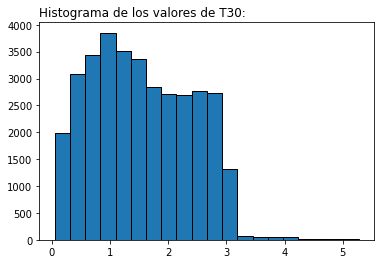

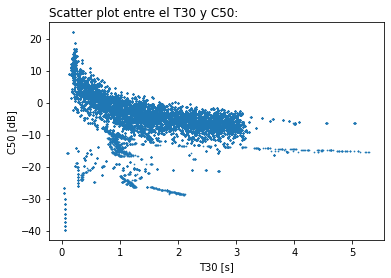

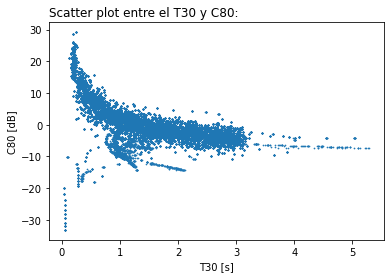

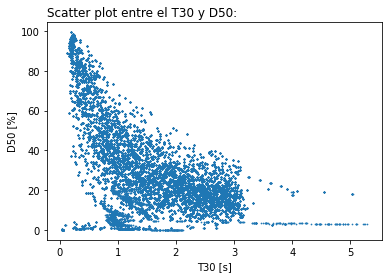


Análisis para la banda 250



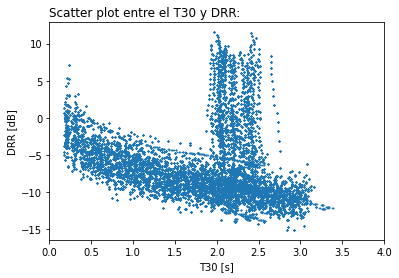

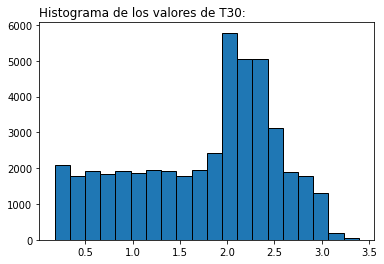

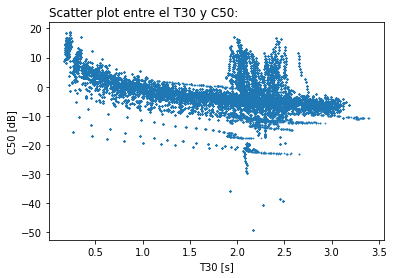

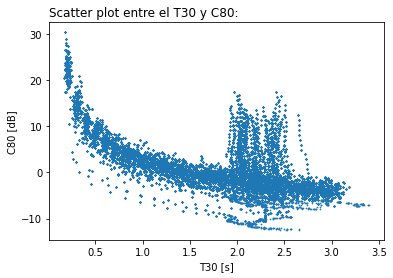

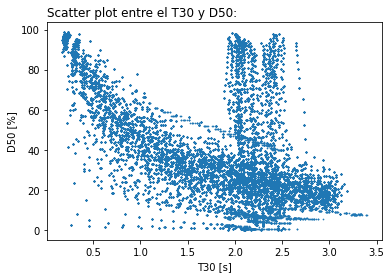


Análisis para la banda 500



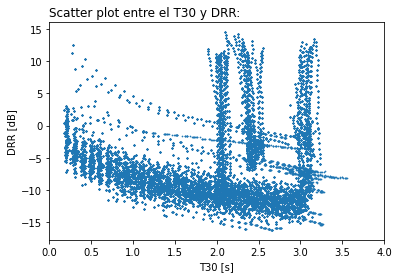

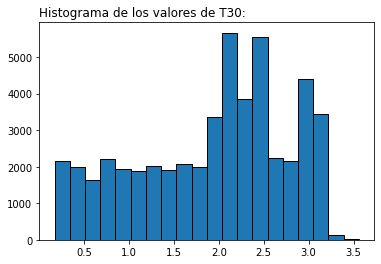

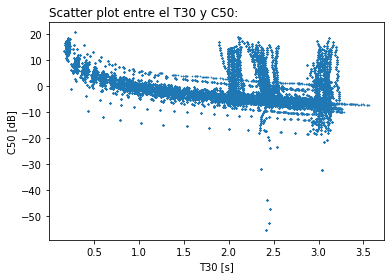

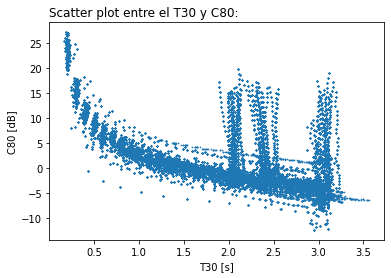

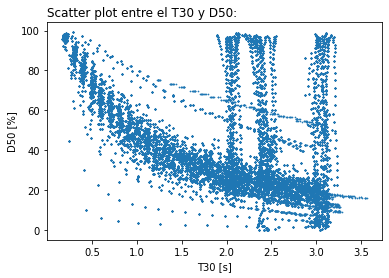


Análisis para la banda 1000



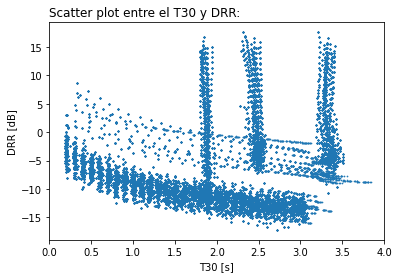

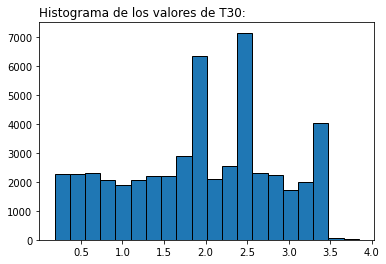

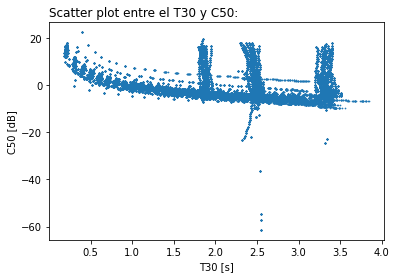

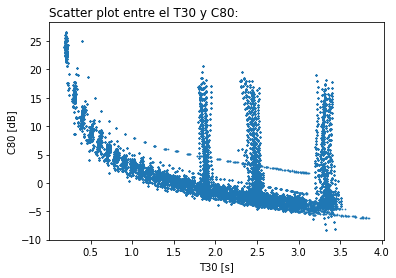

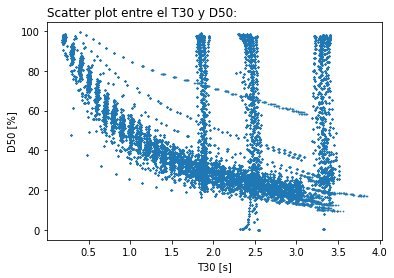


Análisis para la banda 2000



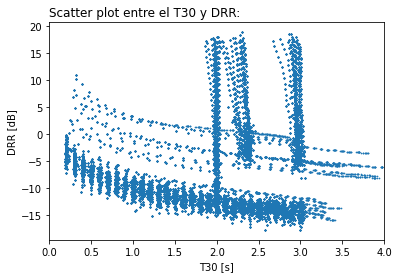

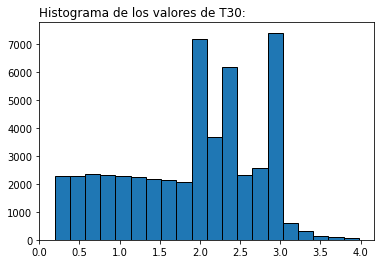

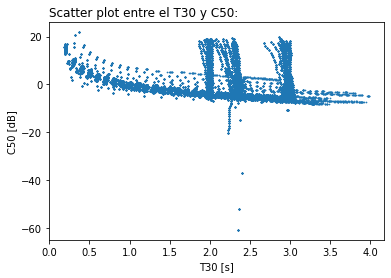

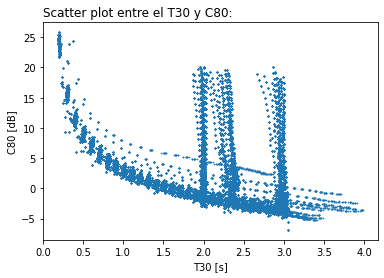

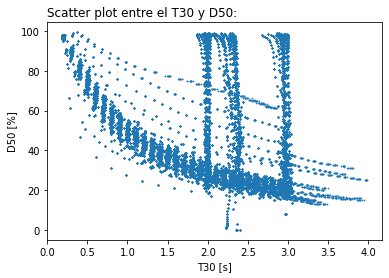


Análisis para la banda 4000



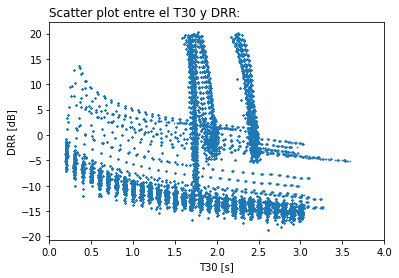

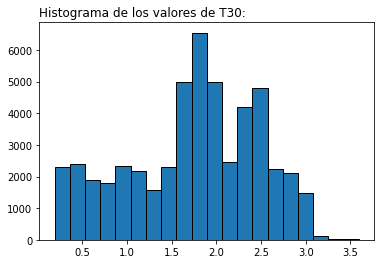

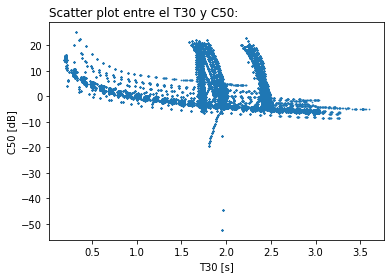

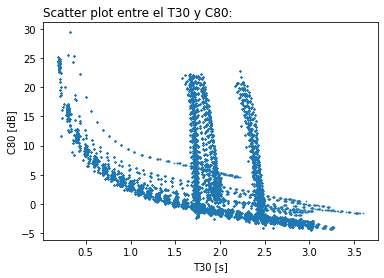

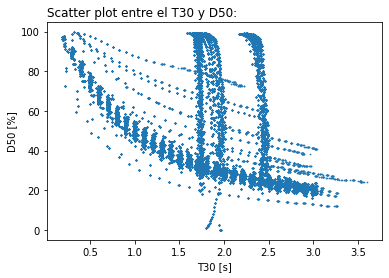


Análisis para la banda 8000



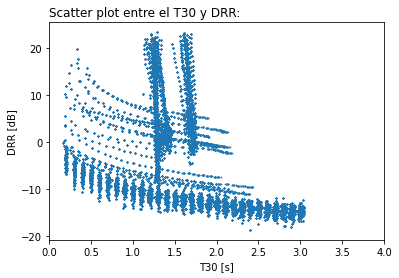

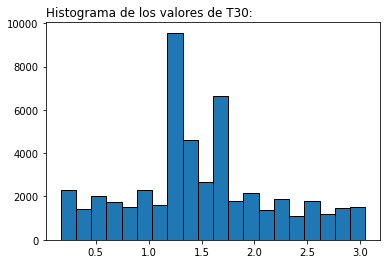

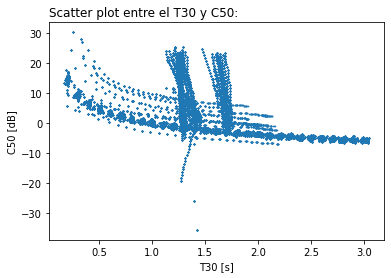

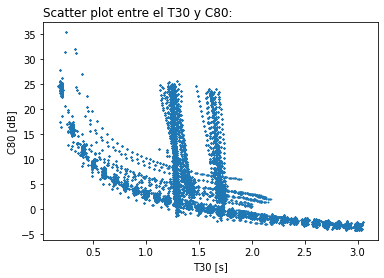

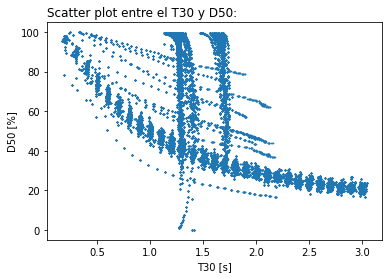

In [8]:
#Análisis de los descriptores por bandas:
for band in bands:
    db_band = db.loc[db.banda == band]

    descriptors = db_band.descriptors.to_numpy()
    drr = db_band.drr.to_numpy()

    t30, c50, c80, d50 = [], [], [], []
    for values in descriptors:
        t30.append(values[0])
        c50.append(values[1])
        c80.append(values[2])
        d50.append(values[3])

    print(f'\nAnálisis para la banda {band}\n')

    plt.plot( t30, drr, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('DRR [dB]')
    plt.xlim(0, 4.0)
    plt.title('Scatter plot entre el T30 y DRR:', loc='left')
    plt.show()
    
    plt.hist(t30, bins=20, edgecolor="black")
    plt.title('Histograma de los valores de T30:', loc='left')
    plt.show()

    plt.plot( t30, c50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C50 [dB]')
    plt.title('Scatter plot entre el T30 y C50:', loc='left')
    plt.show()

    plt.plot( t30, c80, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('C80 [dB]')
    plt.title('Scatter plot entre el T30 y C80:', loc='left')
    plt.show()

    plt.plot( t30, d50, linestyle='', marker='o', markersize=0.7)
    plt.xlabel('T30 [s]')
    plt.ylabel('D50 [%]')
    plt.title('Scatter plot entre el T30 y D50:', loc='left')
    plt.show()


## 2) Análisis del entrenamiento:

### Análisis banda 125 Hz:

In [9]:
band = 125

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

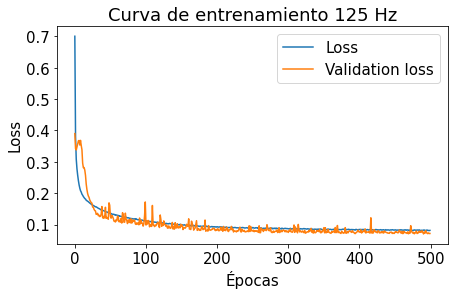

In [10]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  11.,   12.,   25.,   55., 1036., 4926.,  799.,   51.]),
 array([-1.24   , -1.00875, -0.7775 , -0.54625, -0.315  , -0.08375,
         0.1475 ,  0.37875,  0.61   ]),
 <BarContainer object of 8 artists>)

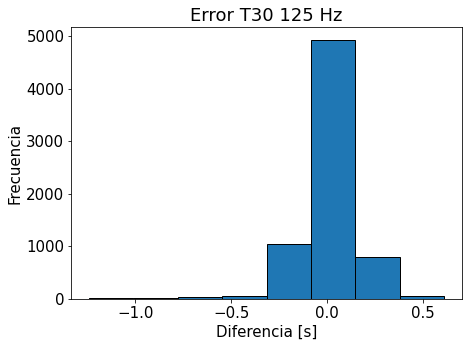

In [11]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.400e+01, 2.220e+02, 3.450e+03, 2.967e+03, 2.290e+02, 2.300e+01,
        9.000e+00, 1.000e+00]),
 array([-2.43   , -1.62875, -0.8275 , -0.02625,  0.775  ,  1.57625,
         2.3775 ,  3.17875,  3.98   ]),
 <BarContainer object of 8 artists>)

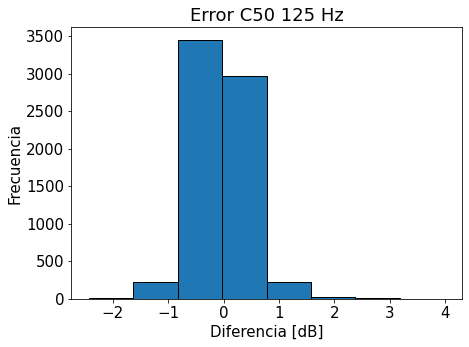

In [12]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([1.000e+01, 8.800e+01, 9.450e+02, 4.724e+03, 1.110e+03, 2.400e+01,
        1.100e+01, 3.000e+00]),
 array([-1.38  , -0.9925, -0.605 , -0.2175,  0.17  ,  0.5575,  0.945 ,
         1.3325,  1.72  ]),
 <BarContainer object of 8 artists>)

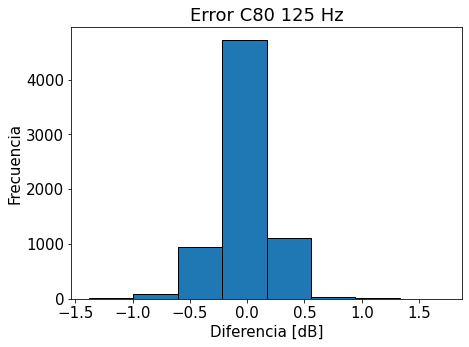

In [13]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  12.,  101.,  783., 2289., 2808.,  822.,   82.,   18.]),
 array([-0.61   , -0.46125, -0.3125 , -0.16375, -0.015  ,  0.13375,
         0.2825 ,  0.43125,  0.58   ]),
 <BarContainer object of 8 artists>)

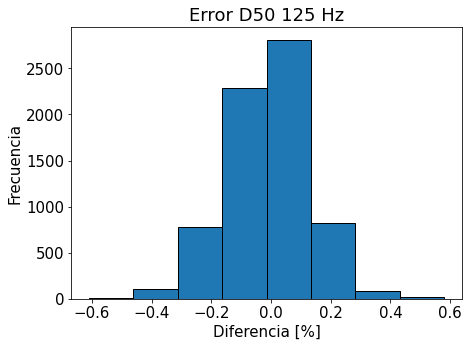

In [14]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

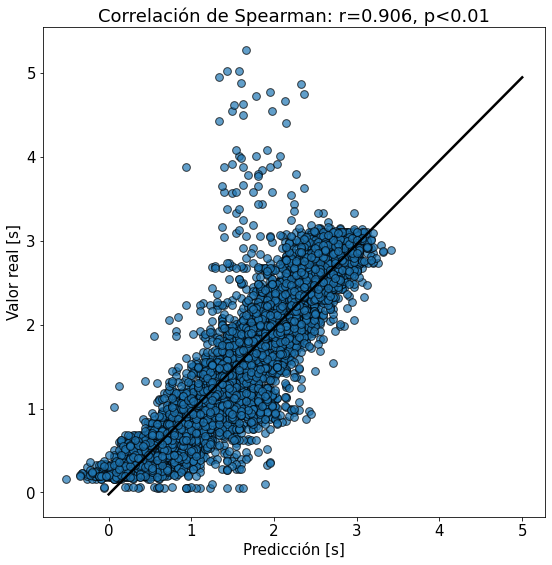

In [15]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

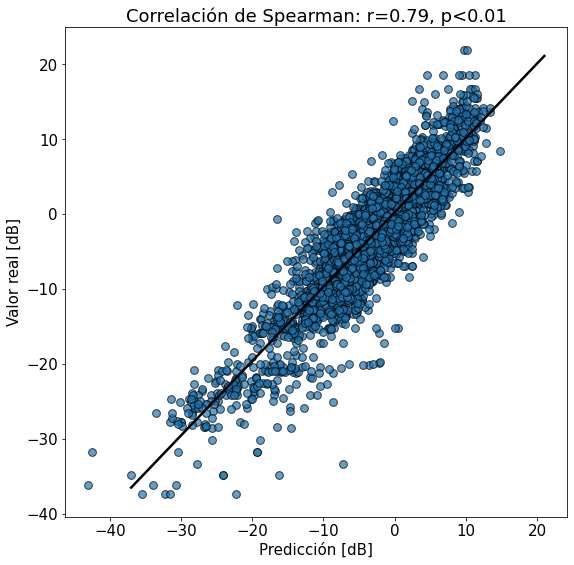

In [16]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

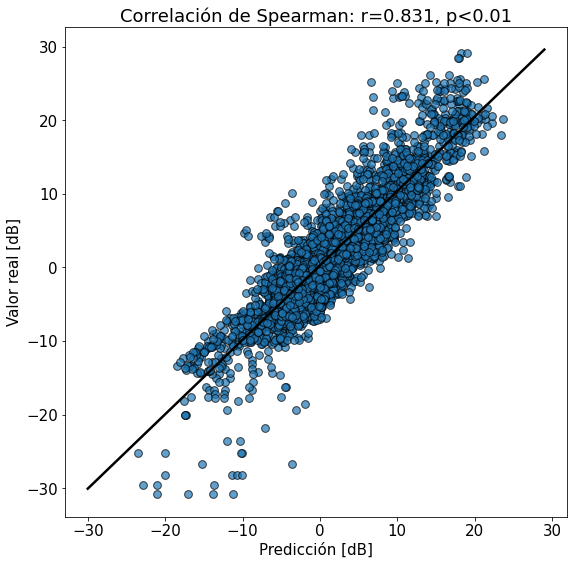

In [17]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

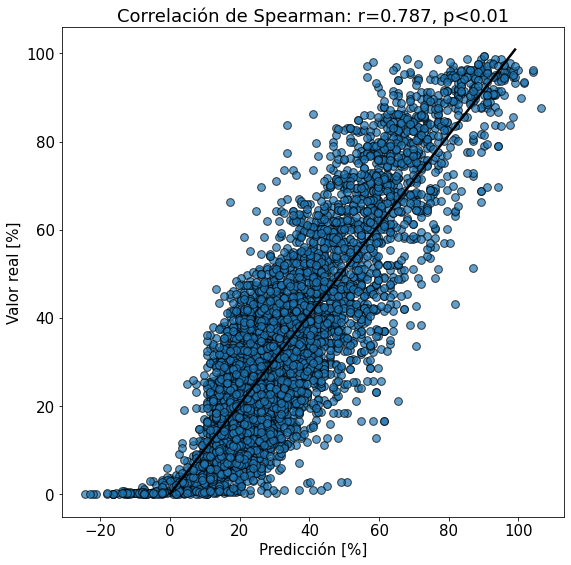

In [18]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 250 Hz:

In [19]:
band = 250

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

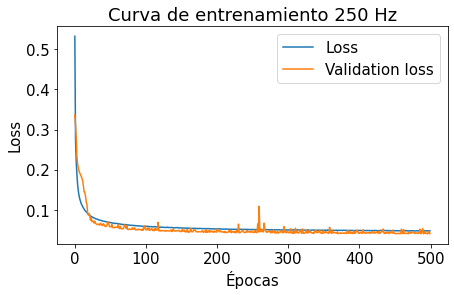

In [20]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  31.,  427., 2168., 3999., 1893.,  532.,   80.,   11.]),
 array([-0.53, -0.38, -0.23, -0.08,  0.07,  0.22,  0.37,  0.52,  0.67]),
 <BarContainer object of 8 artists>)

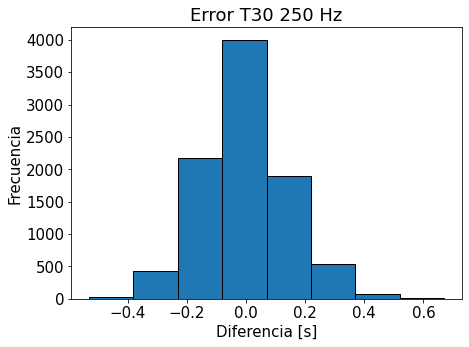

In [21]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.500e+01, 1.973e+03, 6.913e+03, 2.150e+02, 1.100e+01, 3.000e+00,
        8.000e+00, 3.000e+00]),
 array([-1.82   , -1.01875, -0.2175 ,  0.58375,  1.385  ,  2.18625,
         2.9875 ,  3.78875,  4.59   ]),
 <BarContainer object of 8 artists>)

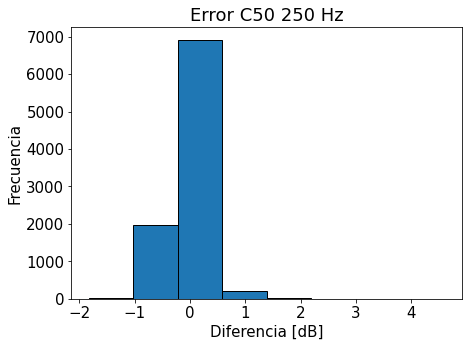

In [22]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([1.000e+00, 6.000e+00, 2.600e+01, 1.170e+02, 2.343e+03, 5.971e+03,
        6.420e+02, 3.500e+01]),
 array([-1.84, -1.49, -1.14, -0.79, -0.44, -0.09,  0.26,  0.61,  0.96]),
 <BarContainer object of 8 artists>)

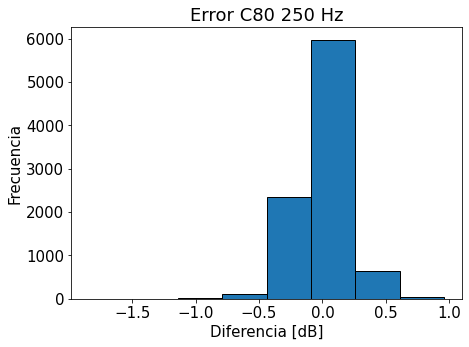

In [23]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([1.300e+01, 2.110e+02, 1.780e+03, 4.310e+03, 2.539e+03, 2.610e+02,
        2.400e+01, 3.000e+00]),
 array([-0.57  , -0.4125, -0.255 , -0.0975,  0.06  ,  0.2175,  0.375 ,
         0.5325,  0.69  ]),
 <BarContainer object of 8 artists>)

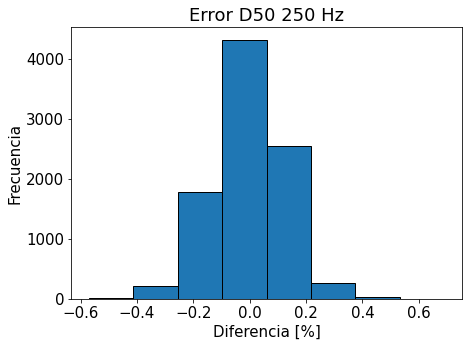

In [24]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

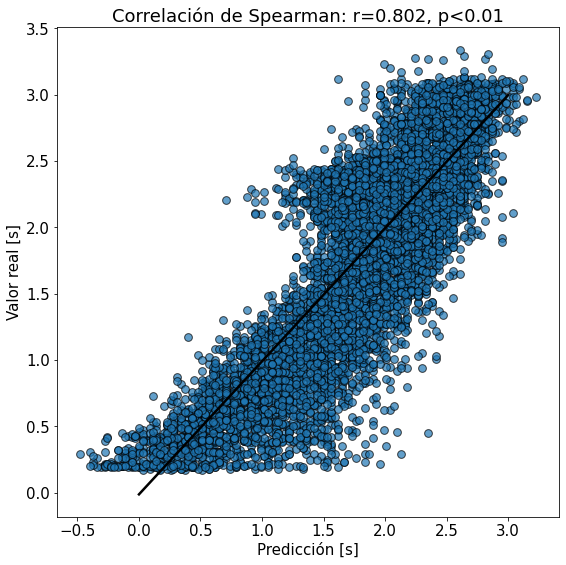

In [25]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

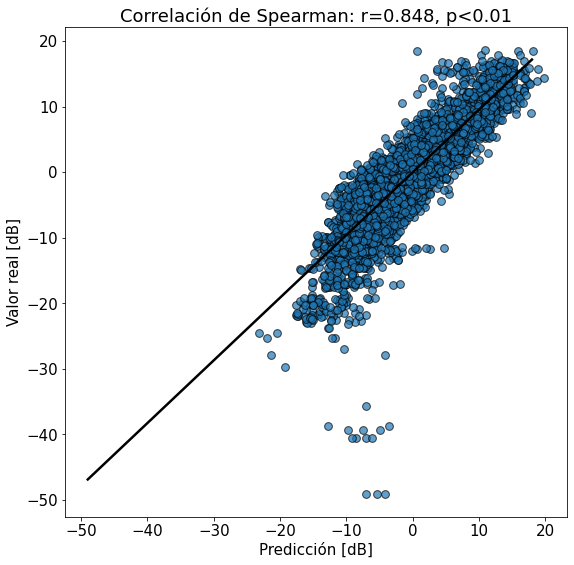

In [26]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

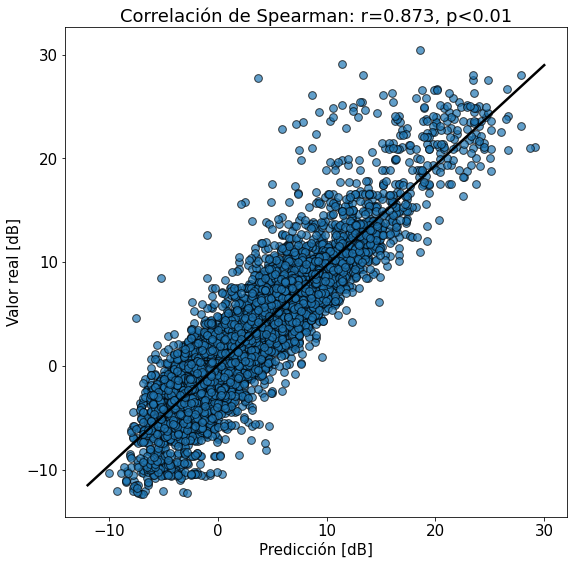

In [27]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

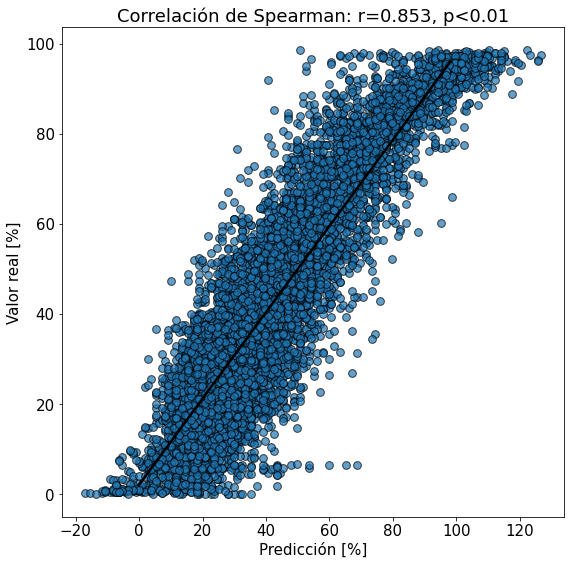

In [28]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 500 Hz:

In [29]:
band = 500

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

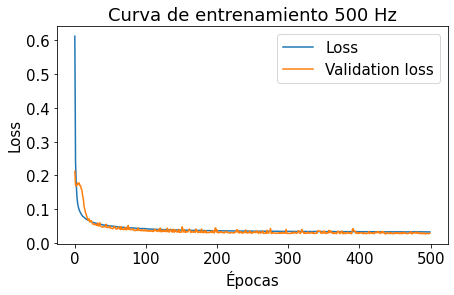

In [30]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  10.,  187., 1084., 3972., 3880.,  849.,  134.,   16.]),
 array([-0.64   , -0.47375, -0.3075 , -0.14125,  0.025  ,  0.19125,
         0.3575 ,  0.52375,  0.69   ]),
 <BarContainer object of 8 artists>)

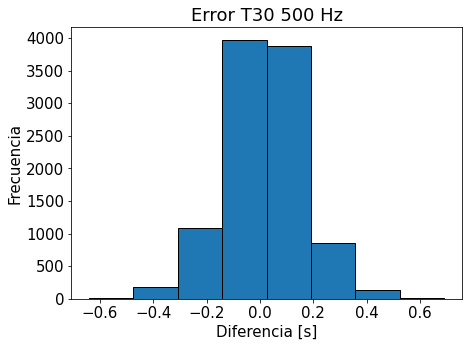

In [31]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([4.300e+01, 8.149e+03, 1.862e+03, 6.200e+01, 7.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00]),
 array([-1.35  , -0.6325,  0.085 ,  0.8025,  1.52  ,  2.2375,  2.955 ,
         3.6725,  4.39  ]),
 <BarContainer object of 8 artists>)

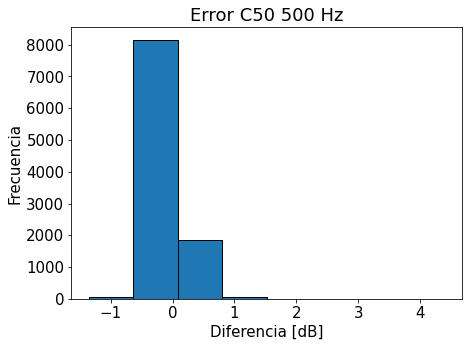

In [32]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([   8.,   17.,   56.,  593., 6655., 2684.,  105.,   14.]),
 array([-1.38, -1.1 , -0.82, -0.54, -0.26,  0.02,  0.3 ,  0.58,  0.86]),
 <BarContainer object of 8 artists>)

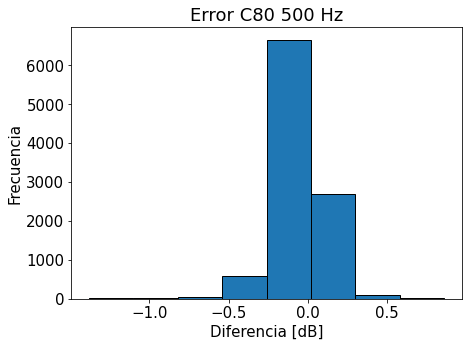

In [33]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([3.000e+00, 8.900e+01, 1.553e+03, 6.190e+03, 2.151e+03, 1.260e+02,
        1.600e+01, 4.000e+00]),
 array([-0.64  , -0.4675, -0.295 , -0.1225,  0.05  ,  0.2225,  0.395 ,
         0.5675,  0.74  ]),
 <BarContainer object of 8 artists>)

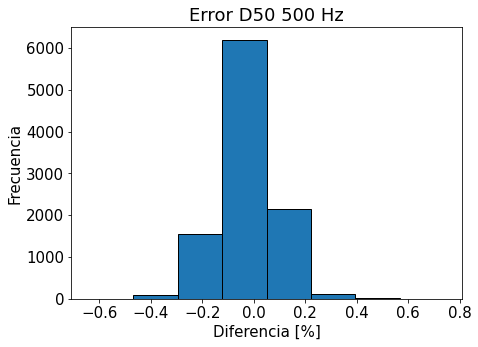

In [34]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

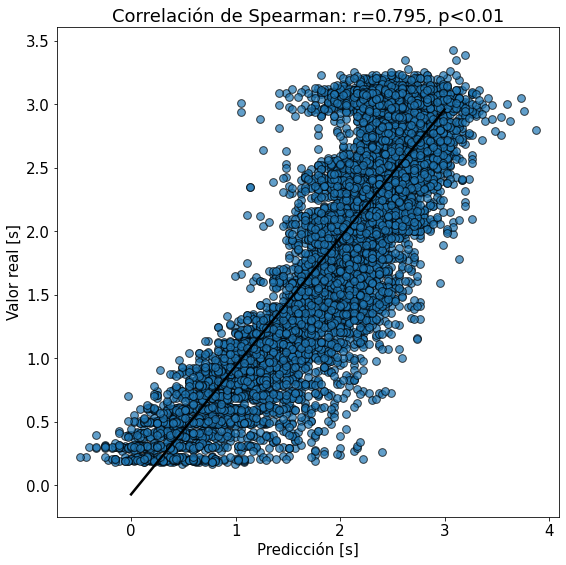

In [35]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

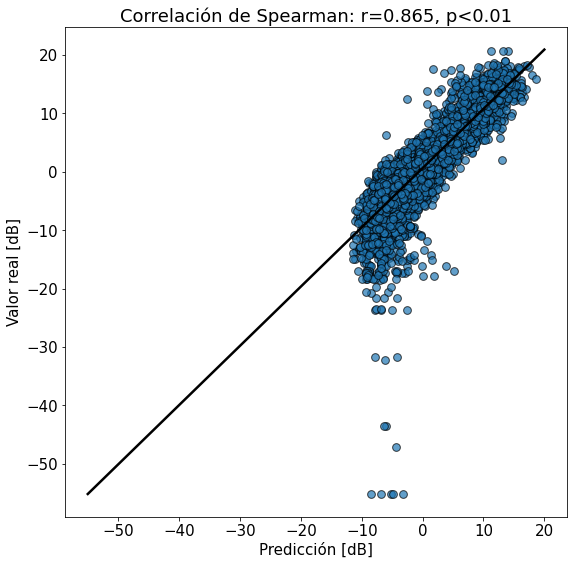

In [36]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

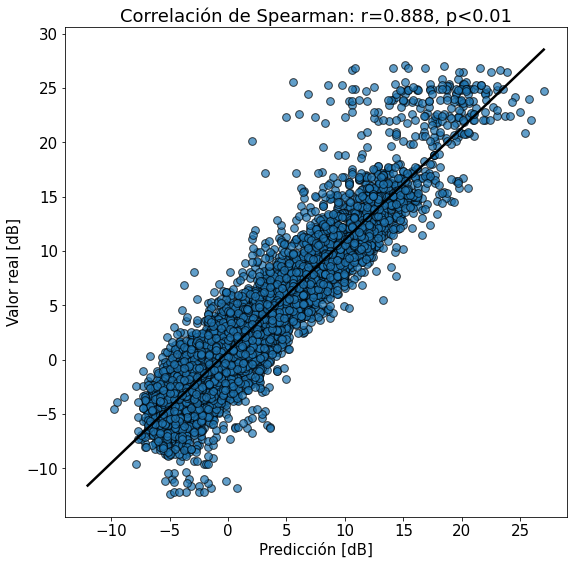

In [37]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

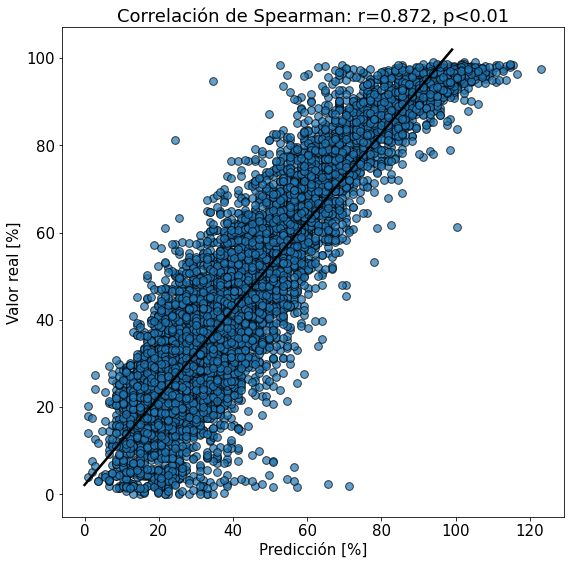

In [38]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 1000 Hz:

In [39]:
band = 1000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

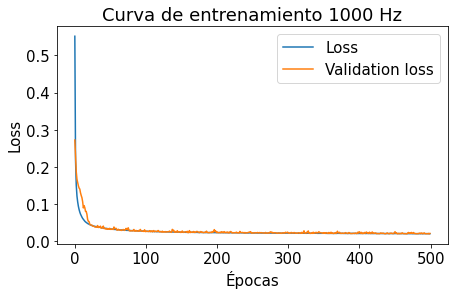

In [40]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([  14.,  137., 1117., 4178., 3791.,  839.,   60.,    6.]),
 array([-0.59   , -0.42625, -0.2625 , -0.09875,  0.065  ,  0.22875,
         0.3925 ,  0.55625,  0.72   ]),
 <BarContainer object of 8 artists>)

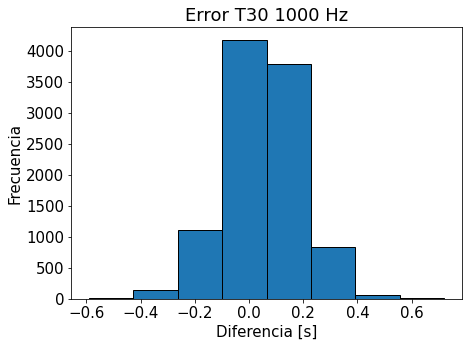

In [41]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([4.500e+02, 9.624e+03, 4.700e+01, 1.100e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 8.000e+00]),
 array([-0.93 , -0.245,  0.44 ,  1.125,  1.81 ,  2.495,  3.18 ,  3.865,
         4.55 ]),
 <BarContainer object of 8 artists>)

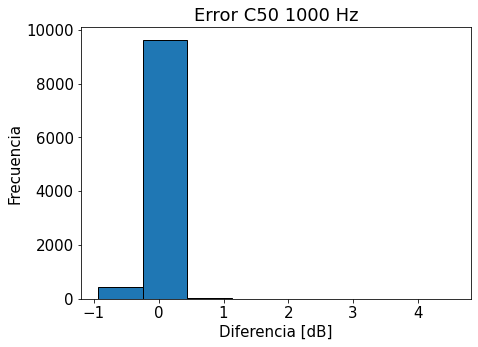

In [42]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([4.000e+00, 2.300e+01, 9.500e+01, 1.383e+03, 6.753e+03, 1.696e+03,
        1.750e+02, 1.300e+01]),
 array([-0.89   , -0.69875, -0.5075 , -0.31625, -0.125  ,  0.06625,
         0.2575 ,  0.44875,  0.64   ]),
 <BarContainer object of 8 artists>)

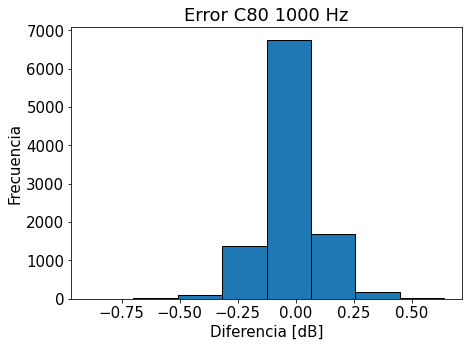

In [43]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([1.000e+00, 4.100e+01, 6.320e+02, 4.909e+03, 4.218e+03, 3.090e+02,
        2.900e+01, 3.000e+00]),
 array([-0.59  , -0.4425, -0.295 , -0.1475,  0.    ,  0.1475,  0.295 ,
         0.4425,  0.59  ]),
 <BarContainer object of 8 artists>)

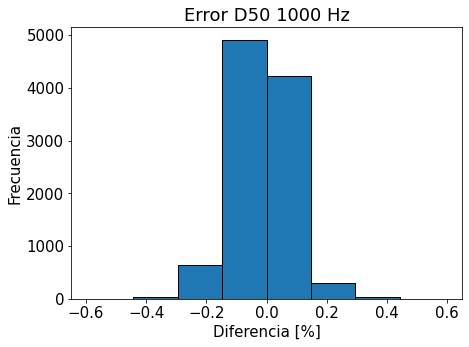

In [44]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

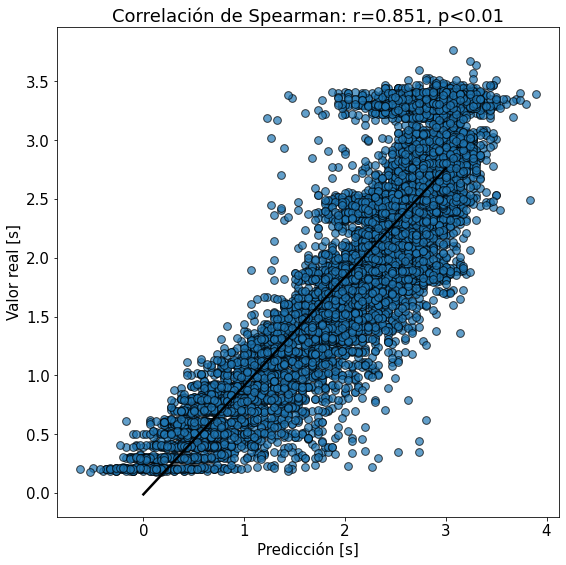

In [45]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

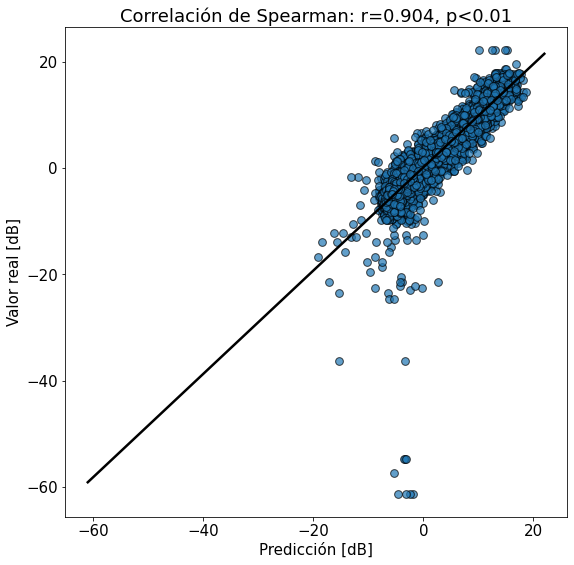

In [46]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

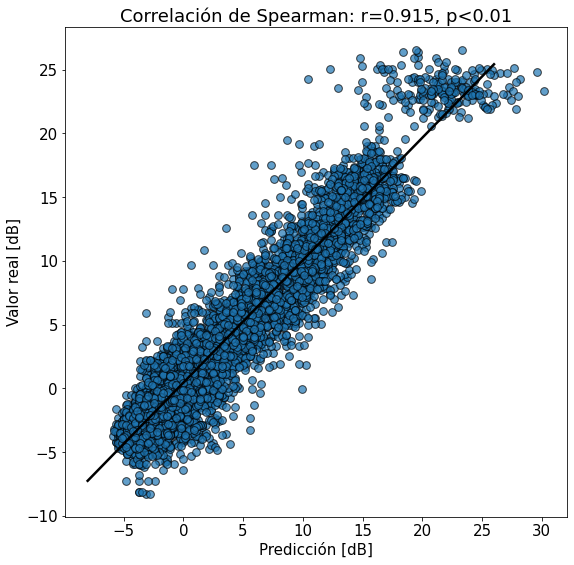

In [47]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

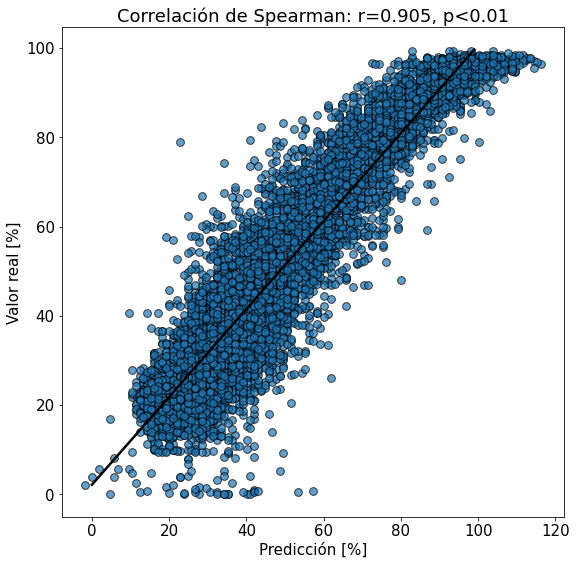

In [48]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 2000 Hz:

In [49]:
band = 2000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

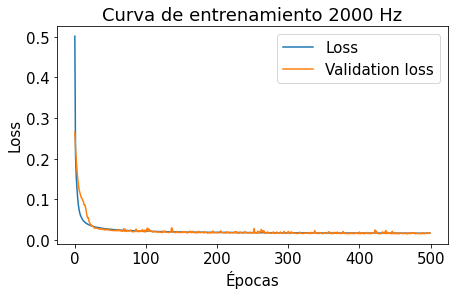

In [50]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([3.000e+00, 1.900e+01, 1.910e+02, 3.046e+03, 5.782e+03, 1.046e+03,
        5.200e+01, 5.000e+00]),
 array([-0.77   , -0.58375, -0.3975 , -0.21125, -0.025  ,  0.16125,
         0.3475 ,  0.53375,  0.72   ]),
 <BarContainer object of 8 artists>)

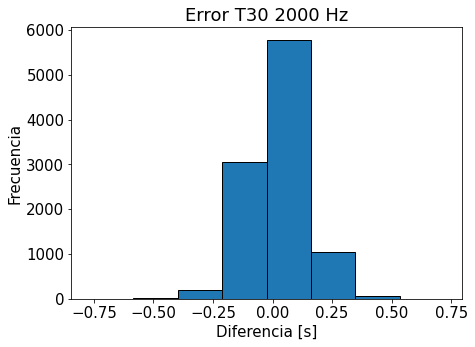

In [51]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.345e+03, 8.749e+03, 3.400e+01, 1.000e+01, 0.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00]),
 array([-0.68   , -0.08625,  0.5075 ,  1.10125,  1.695  ,  2.28875,
         2.8825 ,  3.47625,  4.07   ]),
 <BarContainer object of 8 artists>)

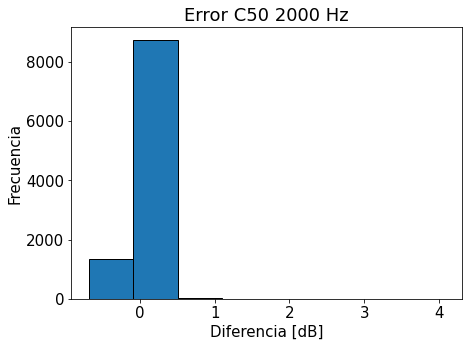

In [52]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([5.000e+00, 1.900e+01, 7.500e+01, 1.109e+03, 6.632e+03, 2.077e+03,
        2.200e+02, 7.000e+00]),
 array([-0.79   , -0.60875, -0.4275 , -0.24625, -0.065  ,  0.11625,
         0.2975 ,  0.47875,  0.66   ]),
 <BarContainer object of 8 artists>)

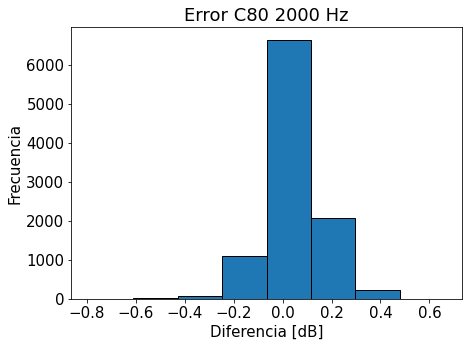

In [53]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([2.500e+01, 3.090e+02, 3.346e+03, 5.329e+03, 1.024e+03, 8.800e+01,
        1.800e+01, 5.000e+00]),
 array([-0.39, -0.26, -0.13,  0.  ,  0.13,  0.26,  0.39,  0.52,  0.65]),
 <BarContainer object of 8 artists>)

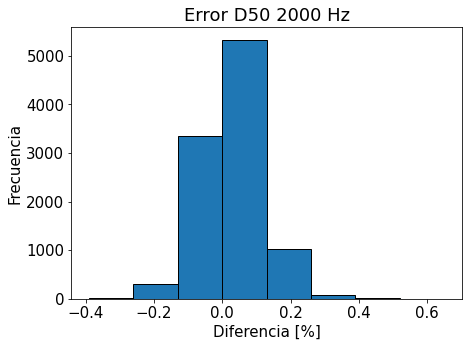

In [54]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

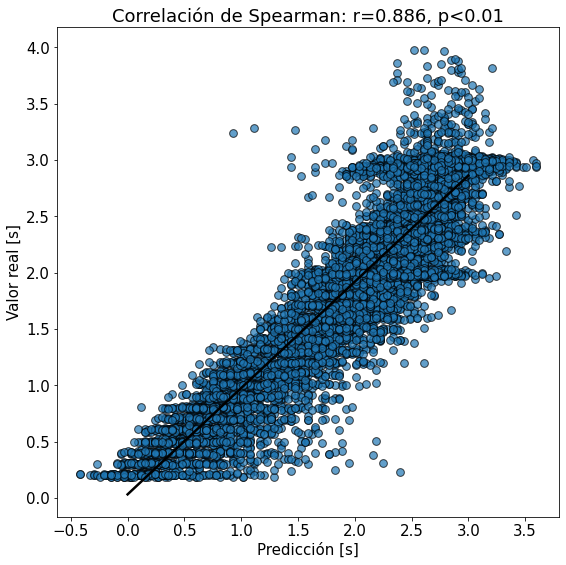

In [55]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

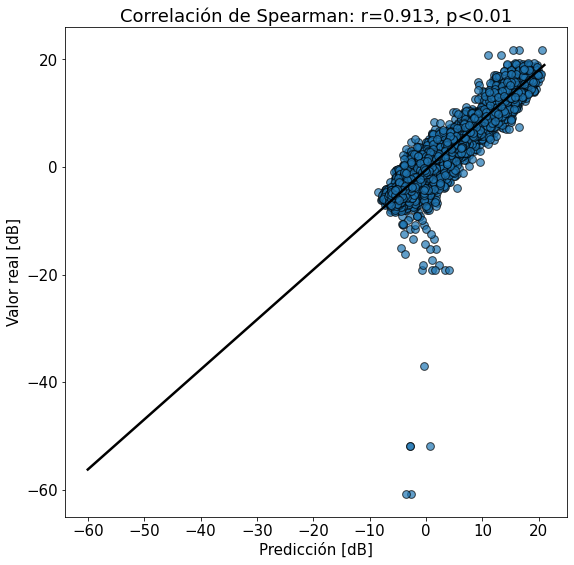

In [56]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

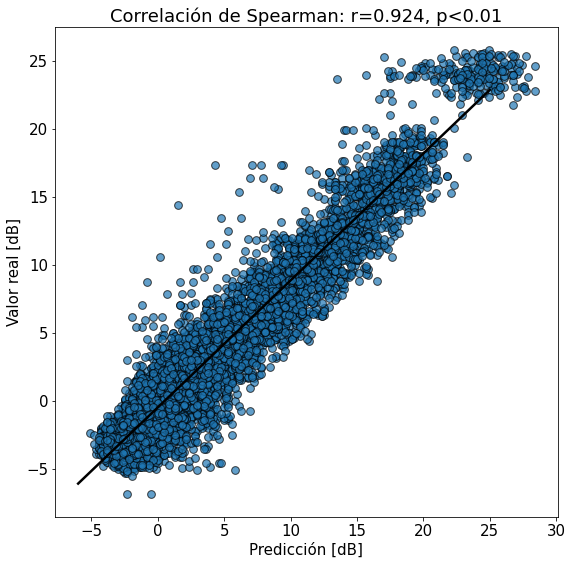

In [57]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

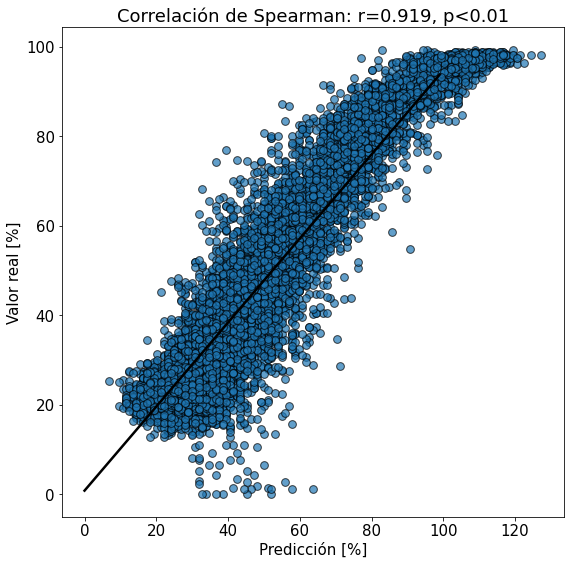

In [58]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 4000 Hz:

In [59]:
band = 4000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

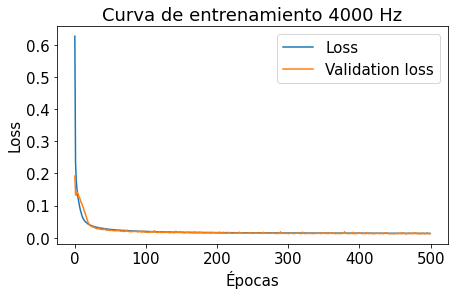

In [60]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([2.000e+00, 7.000e+00, 6.200e+01, 7.530e+02, 4.235e+03, 4.614e+03,
        4.480e+02, 2.300e+01]),
 array([-0.79   , -0.63875, -0.4875 , -0.33625, -0.185  , -0.03375,
         0.1175 ,  0.26875,  0.42   ]),
 <BarContainer object of 8 artists>)

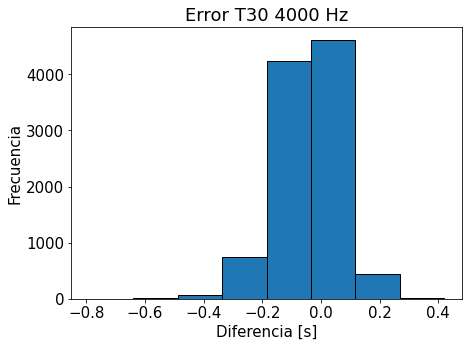

In [61]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.77e+02, 9.79e+03, 1.64e+02, 6.00e+00, 2.00e+00, 0.00e+00,
        2.00e+00, 3.00e+00]),
 array([-0.79   , -0.26875,  0.2525 ,  0.77375,  1.295  ,  1.81625,
         2.3375 ,  2.85875,  3.38   ]),
 <BarContainer object of 8 artists>)

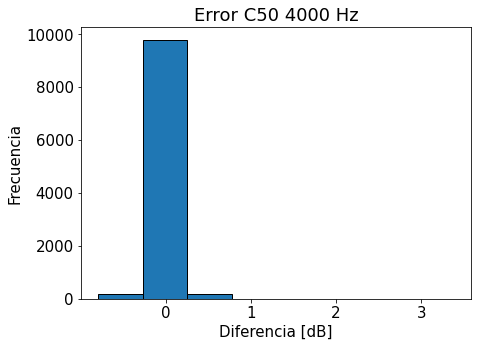

In [62]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([3.000e+00, 1.400e+01, 9.500e+01, 1.305e+03, 7.397e+03, 1.284e+03,
        4.300e+01, 3.000e+00]),
 array([-0.83   , -0.64625, -0.4625 , -0.27875, -0.095  ,  0.08875,
         0.2725 ,  0.45625,  0.64   ]),
 <BarContainer object of 8 artists>)

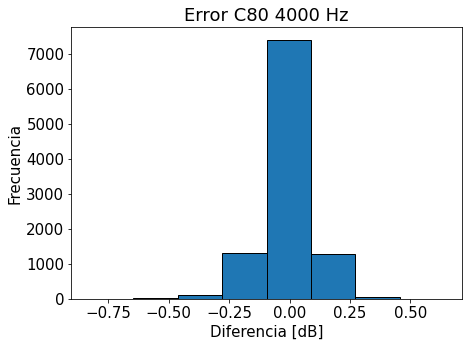

In [63]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([1.000e+01, 2.150e+02, 1.908e+03, 6.555e+03, 1.355e+03, 7.700e+01,
        1.900e+01, 5.000e+00]),
 array([-0.48   , -0.33875, -0.1975 , -0.05625,  0.085  ,  0.22625,
         0.3675 ,  0.50875,  0.65   ]),
 <BarContainer object of 8 artists>)

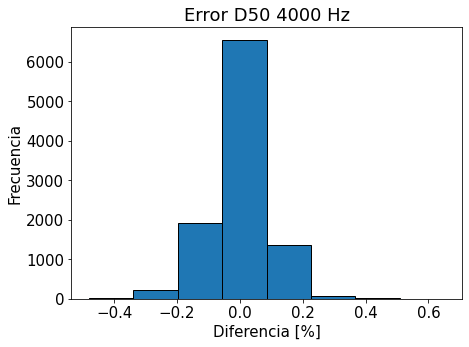

In [64]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

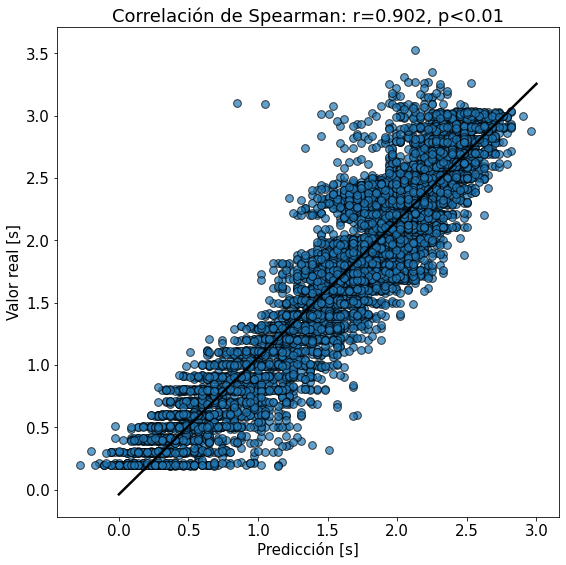

In [65]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

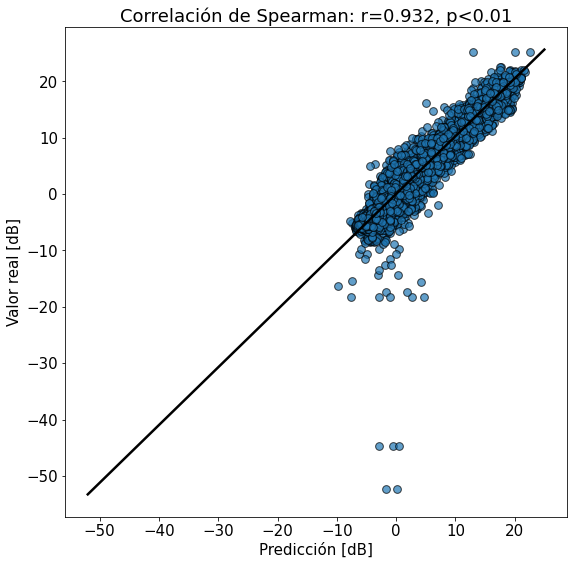

In [66]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

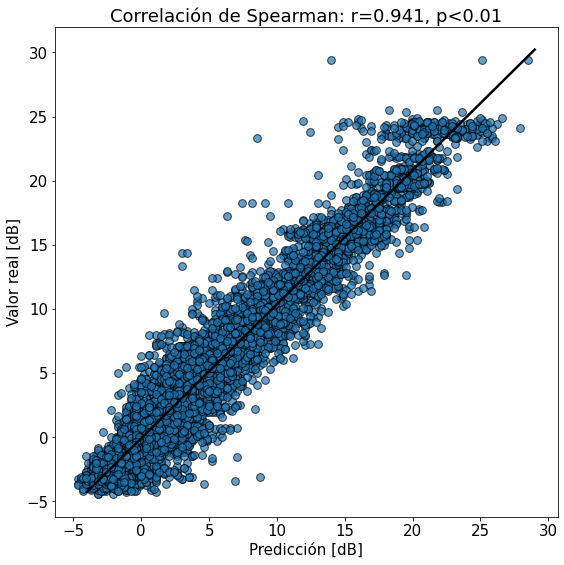

In [67]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

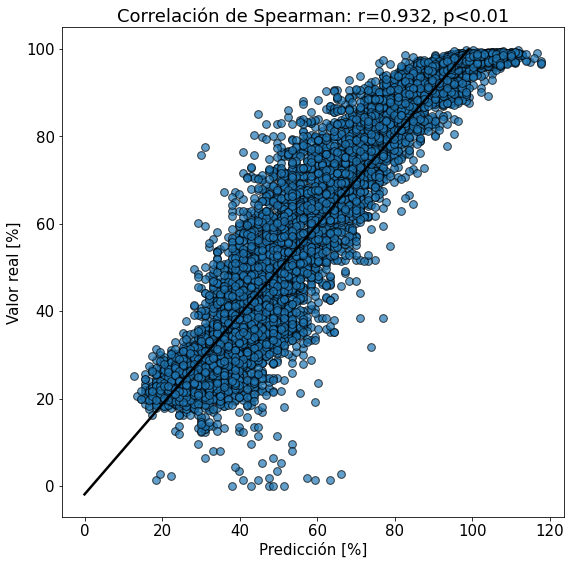

In [68]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

### Análisis banda 8000 Hz:

In [69]:
band = 8000

resumen_t30['Banda [Hz]'].append(band)
resumen_c50['Banda [Hz]'].append(band)
resumen_c80['Banda [Hz]'].append(band)
resumen_d50['Banda [Hz]'].append(band)

with open(f'../results/exp{exp_num}/results_{band}.pickle', 'rb') as handle:
  results = pickle.load(handle)

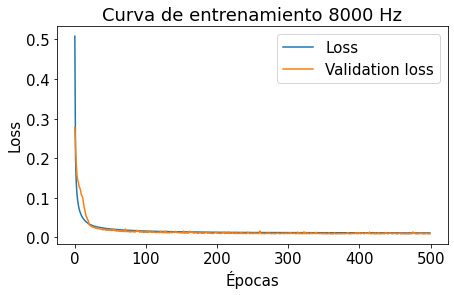

In [70]:
#PLot del val_loss y del loss:
plt.figure(facecolor='white', figsize=[7,4] )
plt.rcParams.update({'font.size': 15})
plt.plot(results['loss'], label='Loss')
plt.plot(results['val_loss'], label='Validation loss')
plt.ylabel('Loss')
plt.xlabel('Épocas')
plt.title(f'Curva de entrenamiento {band} Hz')
plt.legend()
plt.show()

(array([4.000e+00, 3.500e+01, 3.360e+02, 2.297e+03, 4.924e+03, 2.230e+03,
        2.950e+02, 2.300e+01]),
 array([-0.4 , -0.31, -0.22, -0.13, -0.04,  0.05,  0.14,  0.23,  0.32]),
 <BarContainer object of 8 artists>)

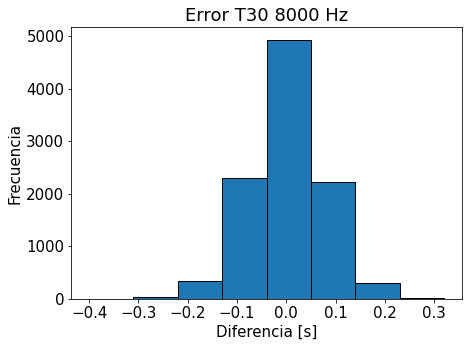

In [71]:
# Error T30:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error T30 {band} Hz')

ax.set_xlabel('Diferencia [s]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_t30'], bins=8, edgecolor="black")

(array([1.940e+02, 8.352e+03, 1.554e+03, 2.400e+01, 9.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00]),
 array([-0.56  , -0.2325,  0.095 ,  0.4225,  0.75  ,  1.0775,  1.405 ,
         1.7325,  2.06  ]),
 <BarContainer object of 8 artists>)

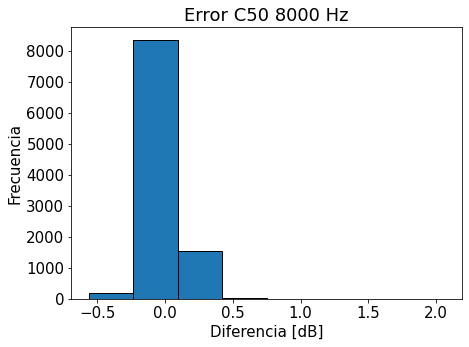

In [72]:
# Error C50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C50 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c50'], bins=8, edgecolor="black")

(array([   9.,   20.,   50.,  480., 4460., 4641.,  455.,   29.]),
 array([-0.68  , -0.5425, -0.405 , -0.2675, -0.13  ,  0.0075,  0.145 ,
         0.2825,  0.42  ]),
 <BarContainer object of 8 artists>)

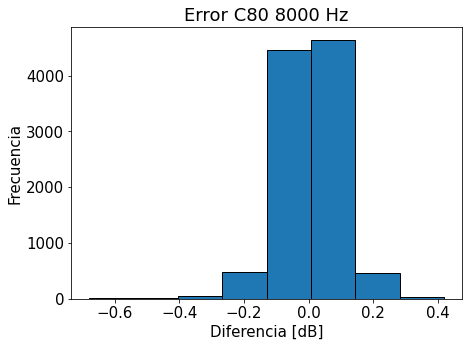

In [73]:
# Error C80:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error C80 {band} Hz')

ax.set_xlabel('Diferencia [dB]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_c80'], bins=8, edgecolor="black")

(array([  34.,  581., 4292., 4578.,  576.,   55.,   19.,    9.]),
 array([-0.39  , -0.2575, -0.125 ,  0.0075,  0.14  ,  0.2725,  0.405 ,
         0.5375,  0.67  ]),
 <BarContainer object of 8 artists>)

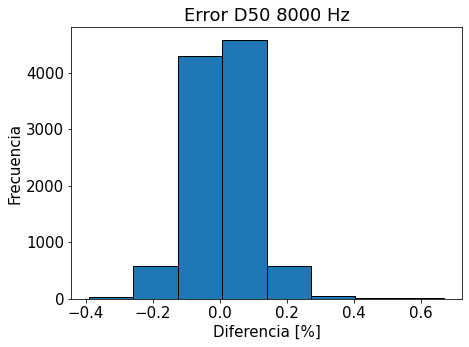

In [74]:
# Error D50:
fig, ax = plt.subplots(figsize = (7, 5))

ax.set_title(f'Error D50 {band} Hz')

ax.set_xlabel('Diferencia [%]')
ax.set_ylabel('Frecuencia')

#plot
ax.hist(results['err_d50'], bins=8, edgecolor="black")

Text(0, 0.5, 'Valor real [s]')

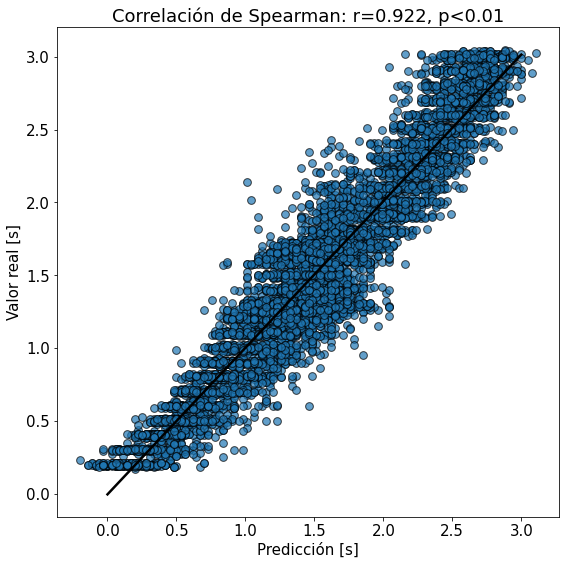

In [75]:
# Generate data: T30
x = [np.round(results['prediction'][i][0] * results['T30_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[0] * results['T30_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_t30['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_t30['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [s]')
ax.set_ylabel('Valor real [s]')

Text(0, 0.5, 'Valor real [dB]')

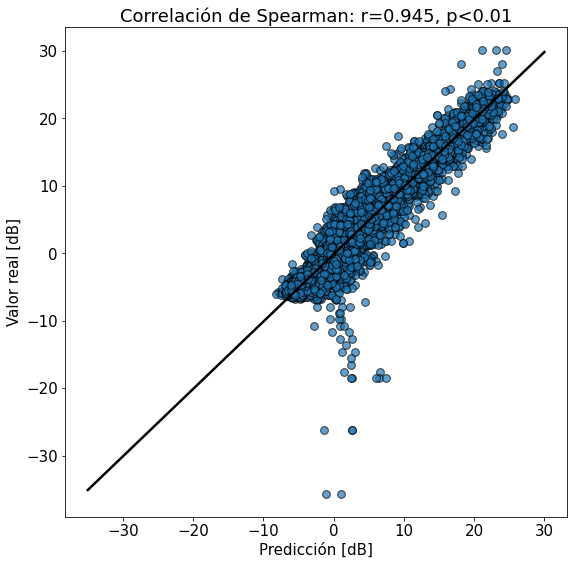

In [76]:
# Generate data: C50
x = [np.round(results['prediction'][i][1] * results['C50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[1] * results['C50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [dB]')

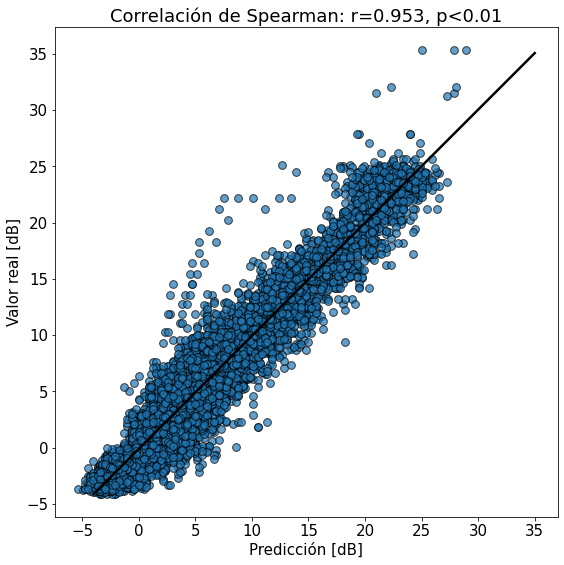

In [77]:
# Generate data: C80
x = [np.round(results['prediction'][i][2] * results['C80_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[2] * results['C80_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_c80['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_c80['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [dB]')
ax.set_ylabel('Valor real [dB]')

Text(0, 0.5, 'Valor real [%]')

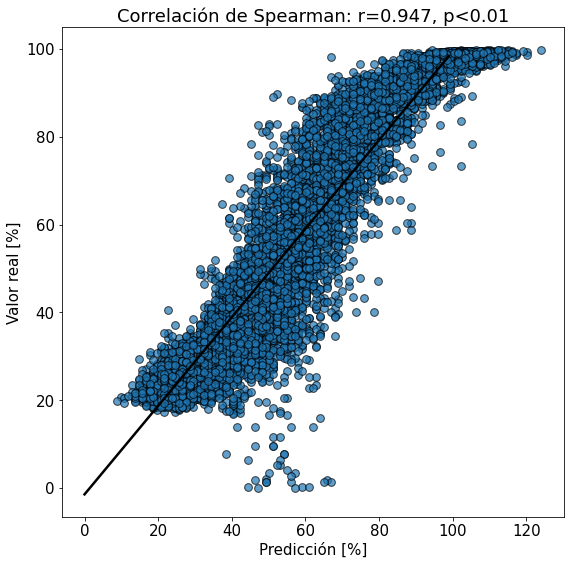

In [78]:
# Generate data: d50
x = [np.round(results['prediction'][i][3] * results['D50_perc_95'],2) for i in range(len(results['y_test']))]
y = [np.round(results['y_test'][i,:,0].reshape(1,-1,1).flatten()[3] * results['D50_perc_95'] ,2)  for i in range(len(results['y_test']))]

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(int(np.min(y)), int(np.max(y)), num=100)

resumen_d50['r'].append(np.round(stats.spearmanr(x, y)[0],3))
resumen_d50['p'].append(np.round(stats.spearmanr(x, y)[1],3))

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

ax.set_title(f'Correlación de Spearman: r={str(np.round(stats.spearmanr(x, y)[0],3))}, p<0.01')
ax.set_xlabel('Predicción [%]')
ax.set_ylabel('Valor real [%]')

## 3) Estimación con el modelo entrenado:

In [79]:
sys.path.append('../code')
import modeling

In [80]:
blind_estimation_model = modeling.model(filters, kernel_size, activation, pool_size, learning_rate)
blind_estimation_model.load_weights(f'../results/exp{exp_num}/weights_125.h5')

In [81]:
from sklearn.model_selection import train_test_split
tae = list(db.tae.to_numpy())[0:10]
descriptors = list(db.descriptors.to_numpy())[0:10]

tae, descriptors = modeling.reshape_data(tae, descriptors)

X_train, X_test, y_train, y_test = train_test_split(tae, descriptors, test_size=0.2, random_state=222)

y_train, y_test, T30_perc_95, C50_perc_95, C80_perc_95, D50_perc_95 = modeling.normalize_descriptors(descriptors, y_train, y_test)

predict = modeling.prediction(blind_estimation_model, X_test, y_test)

err_t30, err_c50, err_c80, err_d50 = modeling.descriptors_err(predict, y_test)

1/1 [==============================] - 0s 63ms/step


In [82]:
print(predict)
print(y_test)

[array([ 0.78, -0.9 , -0.2 ,  0.28], dtype=float32), array([ 0.93, -1.06, -0.32,  0.2 ], dtype=float32)]
[[[0.99848214]
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.97382784]
  [1.64856363]
  [2.24014192]
  [0.66268445]]]


## 4) Resumen:

In [83]:
print('Análisis de resultados T30:\n')

results_t30 = pd.DataFrame(data=resumen_t30)

print(results_t30)

Análisis de resultados T30:

   Banda [Hz]      r    p  Tot audios  Percentil 95    Max    Min
0         125  0.906  0.0       34575         2.912  5.280  0.047
1         250  0.802  0.0       45701         2.837  3.394  0.173
2         500  0.795  0.0       50660         3.080  3.560  0.171
3        1000  0.851  0.0       50710         3.335  3.844  0.184
4        2000  0.886  0.0       50720         2.996  3.979  0.189
5        4000  0.902  0.0       50720         2.847  3.595  0.191
6        8000  0.922  0.0       50720         2.800  3.047  0.169


In [84]:
print('Análisis de resultados C50:\n')

results_c50 = pd.DataFrame(data=resumen_c50)

print(results_c50)

Análisis de resultados C50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         125  0.790  0.0       34575         6.558  21.966 -39.778
1         250  0.848  0.0       45701         9.790  18.684 -49.133
2         500  0.865  0.0       50660        11.862  20.633 -55.247
3        1000  0.904  0.0       50710        13.089  22.323 -61.416
4        2000  0.913  0.0       50720        14.300  21.808 -60.862
5        4000  0.932  0.0       50720        15.554  25.120 -52.364
6        8000  0.945  0.0       50720        17.888  30.173 -35.736


In [85]:
print('Análisis de resultados C80:\n')

results_c80 = pd.DataFrame(data=resumen_c80)

print(results_c80)

Análisis de resultados C80:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max     Min
0         125  0.831  0.0       34575        13.431  29.137 -33.154
1         250  0.873  0.0       45701        13.091  30.478 -12.480
2         500  0.888  0.0       50660        14.539  27.140 -12.381
3        1000  0.915  0.0       50710        15.569  26.568  -8.297
4        2000  0.924  0.0       50720        16.503  25.831  -6.885
5        4000  0.941  0.0       50720        18.617  29.426  -4.459
6        8000  0.953  0.0       50720        21.436  35.368  -4.164


In [86]:
print('Análisis de resultados D50:\n')

results_d50 = pd.DataFrame(data=resumen_d50)

print(results_d50)

Análisis de resultados D50:

   Banda [Hz]      r    p  Tot audios  Percentil 95     Max    Min
0         125  0.787  0.0       34575        81.906  99.368  0.011
1         250  0.853  0.0       45701        90.501  98.664  0.001
2         500  0.872  0.0       50660        93.885  99.143  0.000
3        1000  0.905  0.0       50710        95.320  99.418  0.000
4        2000  0.919  0.0       50720        96.417  99.345  0.000
5        4000  0.932  0.0       50720        97.292  99.693  0.001
6        8000  0.947  0.0       50720        98.400  99.904  0.027
